In [72]:
!pip install ydata_profiling
!pip install PyQt5

In [73]:
import pandas as pd
from ydata_profiling import ProfileReport

# Sentiment Analysis using Machine Learning Models
#### Author: Lola Jackson

## Exploratory Data Analysis
#### Dataset Overview and Descriptive Statistics

In [74]:
#get cwd
import os
os.getcwd()

'/home/jovyan'

In [75]:
#open twitter file
airline = pd.read_csv('Tweets.csv')
airline.head(5)

tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN              0   
2                    NaN  yvonnalynn                 NaN              0   
3                    NaN    jnardino                 NaN              0   
4                    NaN    jnardino                 NaN              0   

                                                text tweet_coord  \
0                @VirginAmerica What @dhepburn said.         NaN   
1  @VirginAmerica plus you've added commercials t...         NaN   
2  @VirginAmerica I didn't today... Must mean I n...         NaN   
3  @VirginAmerica it's really aggressive to blast...         NaN   
4  @VirginAmerica and it's a really big bad thing...         NaN   

               tweet_created tweet_location               user_timezone  
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)  
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)  
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)  
3  2015-02-24 11:15:36 -0800            NaN  Pacific Time (US & Canada)  
4  2015-02-24 11:14:45 -0800            NaN  Pacific Time (US & Canada)

In [76]:
airline["tweet_day"] = airline["tweet_created"].map(lambda x: int(x[8: 10]))
airline

tweet_id airline_sentiment  airline_sentiment_confidence  \
0      570306133677760513           neutral                        1.0000   
1      570301130888122368          positive                        0.3486   
2      570301083672813571           neutral                        0.6837   
3      570301031407624196          negative                        1.0000   
4      570300817074462722          negative                        1.0000   
...                   ...               ...                           ...   
14635  569587686496825344          positive                        0.3487   
14636  569587371693355008          negative                        1.0000   
14637  569587242672398336           neutral                        1.0000   
14638  569587188687634433          negative                        1.0000   
14639  569587140490866689           neutral                        0.6771   

               negativereason  negativereason_confidence         airline  \
0                         NaN                        NaN  Virgin America   
1                         NaN                     0.0000  Virgin America   
2                         NaN                        NaN  Virgin America   
3                  Bad Flight                     0.7033  Virgin America   
4                  Can't Tell                     1.0000  Virgin America   
...                       ...                        ...             ...   
14635                     NaN                     0.0000        American   
14636  Customer Service Issue                     1.0000        American   
14637                     NaN                        NaN        American   
14638  Customer Service Issue                     0.6659        American   
14639                     NaN                     0.0000        American   

      airline_sentiment_gold             name negativereason_gold  \
0                        NaN          cairdin                 NaN   
1                        NaN         jnardino                 NaN   
2                        NaN       yvonnalynn                 NaN   
3                        NaN         jnardino                 NaN   
4                        NaN         jnardino                 NaN   
...                      ...              ...                 ...   
14635                    NaN  KristenReenders                 NaN   
14636                    NaN         itsropes                 NaN   
14637                    NaN         sanyabun                 NaN   
14638                    NaN       SraJackson                 NaN   
14639                    NaN        daviddtwu                 NaN   

       retweet_count                                               text  \
0                  0                @VirginAmerica What @dhepburn said.   
1                  0  @VirginAmerica plus you've added commercials t...   
2                  0  @VirginAmerica I didn't today... Must mean I n...   
3                  0  @VirginAmerica it's really aggressive to blast...   
4                  0  @VirginAmerica and it's a really big bad thing...   
...              ...                                                ...   
14635              0  @AmericanAir thank you we got on a different f...   
14636              0  @AmericanAir leaving over 20 minutes Late Flig...   
14637              0  @AmericanAir Please bring American Airlines to...   
14638              0  @AmericanAir you have my money, you change my ...   
14639              0  @AmericanAir we have 8 ppl so we need 2 know h...   

      tweet_coord              tweet_created tweet_location  \
0             NaN  2015-02-24 11:35:52 -0800            NaN   
1             NaN  2015-02-24 11:15:59 -0800            NaN   
2             NaN  2015-02-24 11:15:48 -0800      Lets Play   
3             NaN  2015-02-24 11:15:36 -0800            NaN   
4             NaN  2015-02-24 11:14:45 -0800            NaN   
...           ...                        ...            ...   
14635   

In [77]:
#check data shape (rows, columns)
airline.shape

(14640, 16)

In [78]:
#check datatype of each column
airline.dtypes

tweet_id                          int64
airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_location                   object
user_timezone                    object
tweet_day                         int64
dtype: object

In [79]:
#check row duplicates
airline[airline.duplicated()]

tweet_id airline_sentiment  airline_sentiment_confidence  \
12040  570308309682675712          negative                           1.0   
12059  570305051819941889           neutral                           1.0   
12063  570303383782989824           neutral                           1.0   
12066  570301929580048385           neutral                           1.0   
12068  570301395141836801          negative                           1.0   
12069  570300915418320897          negative                           1.0   
12074  570299252141903873          positive                           1.0   
12075  570298770136674304          negative                           1.0   
12078  570298644475346945          negative                           1.0   
12079  570298371140939776          negative                           1.0   
12086  570296996445204480          negative                           1.0   
12093  570295576446808065          negative                           1.0   
12097  570292403309035520           neutral                           1.0   
12099  570291157340704769          positive                           1.0   
12102  570290334158225408          positive                           1.0   
12105  570289085354541058          negative                           1.0   
12106  570288809532891137          negative                           1.0   
12108  570288167242375168          negative                           1.0   
12109  570287747643998208          negative                           1.0   
12111  570287271234174976           neutral                           1.0   
12118  570283851018317824          negative                           1.0   
12120  570283309093113856           neutral                           1.0   
12126  570281731510571009          negative                           1.0   
12134  570279653337927680          positive                           1.0   
12136  570279220502511617          negative                           1.0   
12137  570279118438182913          positive                           1.0   
12138  570279036582109184          positive                           1.0   
12139  570278869133107201          negative                           1.0   
12142  570276434763128833          negative                           1.0   
12145  570276196405125120          negative                           1.0   
12152  570275384714862592           neutral                           1.0   
12155  570275010759102466          negative                           1.0   
12157  570273819287531520          positive                           1.0   
12158  570273710210469888          positive                           1.0   
12159  570272880556011520          positive                           1.0   
12162  570272018840428544           neutral                           1.0   

                    negativereason  negativereason_confidence   airline  \
12040       Customer Service Issue                        1.0  American   
12059                          NaN                        NaN  American   
12063                          NaN                        NaN  American   
12066                          NaN                        NaN  American   
12068                  Late Flight                        1.0  American   
12069             Cancelled Flight                        1.0  American   
12074                          NaN                        NaN  American   
12075       Customer Service Issue                        1.0  American   
12078       Customer Service Issue                        1.0  American   
12079                  Late Flight                        1.0  American   
12086                  Late Flight                        1.0  American   
12093       Customer Service Issue                        1.0  American   
12097                          NaN                        NaN  American   
12099                          NaN                        NaN  American   
12102                          NaN        

In [80]:
#remove duplicated rows
airline.drop_duplicates(inplace=True)

In [81]:
#statistics for numeric columns by default
airline.describe()

tweet_id  airline_sentiment_confidence  negativereason_confidence  \
count  1.460400e+04                  14604.000000               10503.000000   
mean   5.692157e+17                      0.899923                   0.637644   
std    7.782567e+14                      0.162955                   0.330380   
min    5.675883e+17                      0.335000                   0.000000   
25%    5.685581e+17                      0.692300                   0.360500   
50%    5.694728e+17                      1.000000                   0.670500   
75%    5.698885e+17                      1.000000                   1.000000   
max    5.703106e+17                      1.000000                   1.000000   

       retweet_count     tweet_day  
count   14604.000000  14604.000000  
mean        0.082786     20.939948  
std         0.746647      2.168015  
min         0.000000     16.000000  
25%         0.000000     19.000000  
50%         0.000000     22.000000  
75%         0.000000     23.000000  
max        44.000000     24.000000

In [82]:
#Statistics for all columns
#The top is the most common value. 
#The freq is the most common value’s frequency.
airline.describe(include = 'all')

tweet_id airline_sentiment  airline_sentiment_confidence  \
count   1.460400e+04             14604                  14604.000000   
unique           NaN                 3                           NaN   
top              NaN          negative                           NaN   
freq             NaN              9159                           NaN   
mean    5.692157e+17               NaN                      0.899923   
std     7.782567e+14               NaN                      0.162955   
min     5.675883e+17               NaN                      0.335000   
25%     5.685581e+17               NaN                      0.692300   
50%     5.694728e+17               NaN                      1.000000   
75%     5.698885e+17               NaN                      1.000000   
max     5.703106e+17               NaN                      1.000000   

                negativereason  negativereason_confidence airline  \
count                     9159               10503.000000   14604   
unique                      10                        NaN       6   
top     Customer Service Issue                        NaN  United   
freq                      2904                        NaN    3822   
mean                       NaN                   0.637644     NaN   
std                        NaN                   0.330380     NaN   
min                        NaN                   0.000000     NaN   
25%                        NaN                   0.360500     NaN   
50%                        NaN                   0.670500     NaN   
75%                        NaN                   1.000000     NaN   
max                        NaN                   1.000000     NaN   

       airline_sentiment_gold         name     negativereason_gold  \
count                      40        14604                      32   
unique                      3         7701                      13   
top                  negative  JetBlueNews  Customer Service Issue   
freq                       32           63                      12   
mean                      NaN          NaN                     NaN   
std                       NaN          NaN                     NaN   
min                       NaN          NaN                     NaN   
25%                       NaN          NaN                     NaN   
50%                       NaN          NaN                     NaN   
75%                       NaN          NaN                     NaN   
max                       NaN          NaN                     NaN   

        retweet_count            text tweet_coord              tweet_created  \
count    14604.000000           14604        1015                      14604   
unique            NaN           14427         832                      14247   
top               NaN  @united thanks  [0.0, 0.0]  2015-02-24 09:54:34 -0800   
freq              NaN               6         162                          5   
mean         0.082786             NaN         NaN                        NaN   
std          0.746647             NaN         NaN                        NaN   
min          0.000000             NaN         NaN                        NaN   
25%          0.000000             NaN         NaN                        NaN   
50%          0.000000             NaN         NaN                        NaN   
75%          0.000000             NaN         NaN                        NaN   
max         44.000000             NaN         NaN                        NaN   

       tweet_location               user_timezone     tweet_day  
count            9881                        9790  14604.000000  
unique           3081                          85           NaN  
top        Boston, MA  Eastern Time (US & Canada)           NaN  
freq              157                        3738           NaN  
mean              NaN                         NaN     20.939948  
std               NaN                         NaN      2.168015  
min               NaN                         NaN     

In [83]:
#show number of missing values in each column
airline.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5445
negativereason_confidence        4101
airline                             0
airline_sentiment_gold          14564
name                                0
negativereason_gold             14572
retweet_count                       0
text                                0
tweet_coord                     13589
tweet_created                       0
tweet_location                   4723
user_timezone                    4814
tweet_day                           0
dtype: int64

In [84]:
#show percentage of missing values in each column
round(airline.isna().sum() / len(airline) * 100, 1) 

tweet_id                         0.0
airline_sentiment                0.0
airline_sentiment_confidence     0.0
negativereason                  37.3
negativereason_confidence       28.1
airline                          0.0
airline_sentiment_gold          99.7
name                             0.0
negativereason_gold             99.8
retweet_count                    0.0
text                             0.0
tweet_coord                     93.0
tweet_created                    0.0
tweet_location                  32.3
user_timezone                   33.0
tweet_day                        0.0
dtype: float64

## Exloratory Data Analysis

In [85]:
#Generate EDA report
profile = ProfileReport(airline, title = "Airline Profile")

#Save to html file
profile.to_file("Airline Profile.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Feature Assessment and Visualization

### Focusing on candidates for independent variables and the dependent variables
#### Univariate Analysis and Multivariate Analysis.
#### 1) Univariate Analysis: analysis of one variable.
#### 2) Numeric varibles: mean, standard deviation, skewness, and other quantile statistics, and are best represented using histogram plots. 2) Categorical variables are usually described using the mode and frequency tables, and are best represented using bar plots.

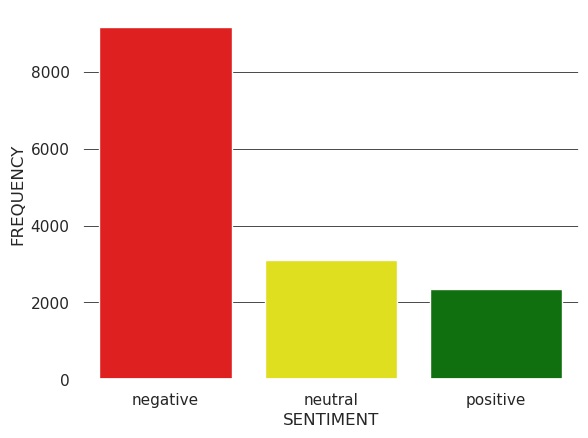

In [86]:
# Barplot to show the number of neutral, positive and neguative reviews.
import matplotlib
matplotlib.use('Agg')

import matplotlib.pyplot as plt  
import seaborn as sns

%matplotlib inline
sns.set(style="darkgrid")

# Create a custom color palette
custom_palette = {'negative': 'red', 'neutral': 'yellow', 'positive': 'green'}

sns.countplot(x='airline_sentiment', data=airline, palette=custom_palette, order=airline['airline_sentiment'].value_counts().index, hue='airline_sentiment', legend=False)
plt.xlabel('SENTIMENT')
plt.ylabel('FREQUENCY')

# Change the background color
plt.gca().set_facecolor('white')  # Change plot area background color
plt.gcf().set_facecolor('white')  # Change figure background color

# Customize grid lines
plt.grid(color='black', linestyle='-', linewidth=0.5, axis='y')  # Changes the color, style, and width of grid lines

plt.show()

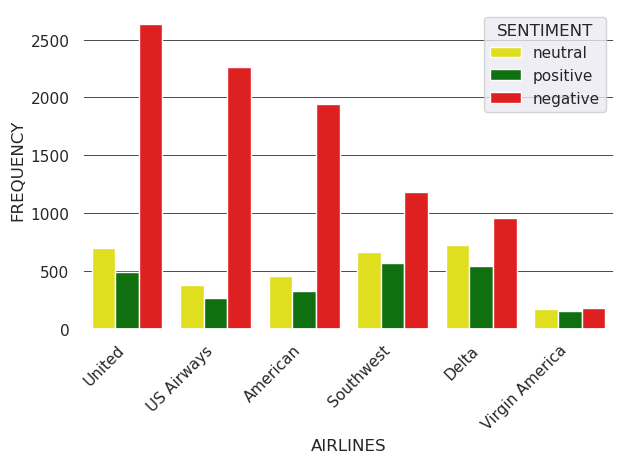

In [87]:
# barplot shows review numbers of each airline, as well as the frequency of sentiment
sns.set(style="darkgrid")

# Create a custom color palette
custom_palette = {'negative': 'red', 'neutral': 'yellow', 'positive': 'green'}

sns.countplot(x = 'airline', data = airline, palette=custom_palette, hue = 'airline_sentiment', order = airline['airline'].value_counts().index)
plt.xlabel('AIRLINES')
plt.ylabel('FREQUENCY')
plt.legend().set_title('SENTIMENT')

# Change the background color
plt.gca().set_facecolor('white')  # Change plot area background color
plt.gcf().set_facecolor('white')  # Change figure background color

# Customize grid lines
plt.grid(color='black', linestyle='-', linewidth=0.5, axis='y')

# Rotate x-axis labels and add padding to improve readability
plt.xticks(rotation=45, ha='right')  # Rotate labels 45 degrees and align them to the right
plt.tight_layout()  # Adjust layout to prevent clipping

plt.show()

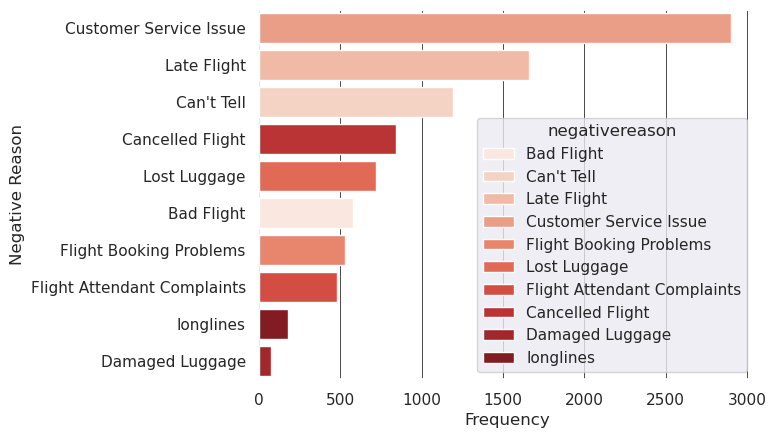

In [88]:
# barplot shows the frequency of the different negative reasons          
sns.set(style="darkgrid")
sns.countplot(y = 'negativereason', data = airline, palette = "Reds", order = airline['negativereason'].value_counts().index, hue = 'negativereason')
plt.xlabel('Frequency')
plt.ylabel('Negative Reason')

# Change the background color
plt.gca().set_facecolor('white')  # Change plot area background color
plt.gcf().set_facecolor('white')  # Change figure background color

# Customize grid lines
plt.grid(color='black', linestyle='-', linewidth=0.5, axis='x')

plt.show()

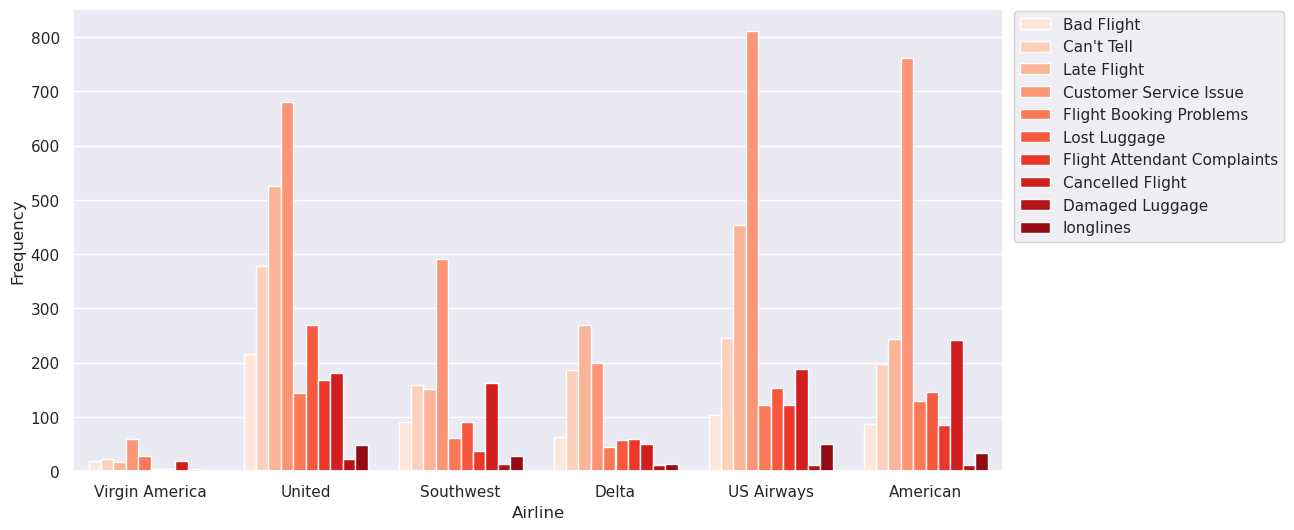

In [89]:
# barplot shows the distribution of negative reasons on each airlines
plt.figure(figsize=(12, 6))
sns.countplot(x = 'airline', data = airline, palette = "Reds", hue = 'negativereason', saturation = True)
plt.xlabel('Airline')
plt.ylabel('Frequency')
plt.legend(bbox_to_anchor = (1.01, 1), loc = 2, borderaxespad = 0.1)
plt.show() 

In [90]:
# Number of each type of sentiment
sentiment_counts = airline['airline_sentiment'].value_counts()
sentiment_counts.to_frame()

count
airline_sentiment       
negative            9159
neutral             3091
positive            2354

In [91]:
#Number of each tweet per airline
airline_counts = airline['airline'].value_counts()
airline_counts.to_frame()

count
airline              
United           3822
US Airways       2913
American         2723
Southwest        2420
Delta            2222
Virgin America    504

In [92]:
#LinePlot frequency of tweets throughout the period
#each line represents an airline
airlineplot = airline[["tweet_id", "airline_sentiment", "airline", "tweet_day"]].sort_values("tweet_day")
airlineplot

tweet_id airline_sentiment         airline  tweet_day
4325   567591480085463040          negative          United         16
4324   567592368451248130          negative          United         16
8965   567588278875213824           neutral           Delta         16
8964   567590027375702016          negative           Delta         16
8823   567816742300356608          negative           Delta         17
...                   ...               ...             ...        ...
12150  570275536406253568           neutral        American         24
12149  570275632518733825           neutral        American         24
12148  570275726483542016          negative        American         24
12168  570270777121103872          negative        American         24
0      570306133677760513           neutral  Virgin America         24

[14604 rows x 4 columns]

In [93]:
tweet_day_counts = airlineplot['tweet_day'].value_counts().sort_index()  # Use sort_index() to keep the days in order

In [94]:
!pip install plotly

In [95]:
!pip install notebook
!pip install ipywidgets

In [96]:
!jupyter nbextension enable --py widgetsnbextension --sys-prefix
!jupyter nbextension install --py widgetsnbextension --sys-prefix

usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: dejavu events execute kernel kernelspec lab
labextension labhub migrate nbclassic nbconvert notebook run server
troubleshoot trust

Jupyter command `jupyter-nbextension` not found.
usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [-

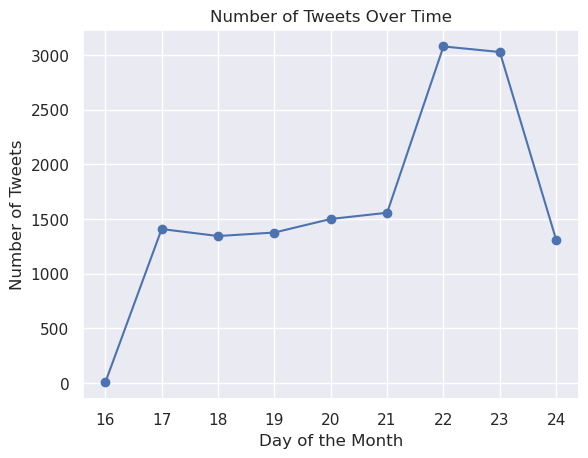

In [97]:
tweet_day_counts.plot(kind='line', marker='o', linestyle='-')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets Over Time')
plt.grid(True)
plt.show()

In [98]:
#fix interactive plot

In [99]:
# Initialize the plot
import plotly.express as px
import plotly.graph_objs as go
import plotly.io as pio

# Define colors for each airline
colors = {
    'United': 'blue',
    'US Airways': 'green',
    'American': 'red',
    'Southwest': 'purple',
    'Delta': 'orange',
    'Virgin America': 'brown'
}

# Initialize the plotly figure
fig = go.Figure()

# Loop through each unique airline and plot their tweet counts
for airline_name in airlineplot['airline'].unique():
    tweet_day_counts = airlineplot[airlineplot['airline'] == airline_name]['tweet_day'].value_counts().sort_index()
    fig.add_trace(go.Scatter(
        x=tweet_day_counts.index, 
        y=tweet_day_counts.values, 
        mode='lines+markers', 
        name=airline_name,
        line=dict(color=colors[airline_name])
    ))

# Update layout for the plot
fig.update_layout(
    title="Number of Tweets Over Time for Each Airline",
    xaxis_title="Day of the Month",
    yaxis_title="Number of Tweets",
    plot_bgcolor='white',
    yaxis=dict(
        showgrid=True, #show horizontal grid lines
        gridcolor='black'
    ),
    xaxis=dict(
        showgrid=True, #show vertical grid lines
        gridcolor='black'
    )
)

# Show the plot
pio.show(fig)

# Text Data Processing

In [100]:
#Select necessary columns from airline dataframe
#columns needed are tweet_id, airline_sentiment, text
# use loc function to select column names
airline_text_process = airline.copy(deep = True).iloc[:,[0, 1, 10]]
airline_text_process.head(5)

tweet_id airline_sentiment  \
0  570306133677760513           neutral   
1  570301130888122368          positive   
2  570301083672813571           neutral   
3  570301031407624196          negative   
4  570300817074462722          negative   

                                                text  
0                @VirginAmerica What @dhepburn said.  
1  @VirginAmerica plus you've added commercials t...  
2  @VirginAmerica I didn't today... Must mean I n...  
3  @VirginAmerica it's really aggressive to blast...  
4  @VirginAmerica and it's a really big bad thing...

In [101]:
#drop null values
airline_text_process.dropna(inplace=True)
#change tweet_id column to str type
airline_text_process['tweet_id'] = airline_text_process['tweet_id'].astype(str)
airline_text_process.head(5)

tweet_id airline_sentiment  \
0  570306133677760513           neutral   
1  570301130888122368          positive   
2  570301083672813571           neutral   
3  570301031407624196          negative   
4  570300817074462722          negative   

                                                text  
0                @VirginAmerica What @dhepburn said.  
1  @VirginAmerica plus you've added commercials t...  
2  @VirginAmerica I didn't today... Must mean I n...  
3  @VirginAmerica it's really aggressive to blast...  
4  @VirginAmerica and it's a really big bad thing...

In [102]:
#convert table to HTML to solve visibility issue in the text column
#!pip install iPython
from IPython.display import HTML
HTML (airline_text_process.to_html())

In [103]:
import re

In [104]:
!pip install nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [105]:
stopWords = set(stopwords.words('english'))
white_list = ["not", "no", "won't", "isn't", "couldn't", "wasn't", "didn't", "shouldn't", 
"hasn't", "wouldn't", "haven't", "weren't", "hadn't", "shan't", "doesn't",
"mightn't", "mustn't", "needn't", "don't", "aren't", "won't"]

In [106]:
import string

In [107]:
from nltk.tokenize import word_tokenize
from nltk import PorterStemmer as Stemmer

In [108]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer 
from nltk import pos_tag

In [109]:
# define stemming function
# def stemmer_text(text):
#     text = word_tokenize(str(text))   # Init the Wordnet Lemmatizer    
#     st = Stemmer()  
#     text = [st.stem(t) for t in text]
#     return (' '.join(text))

In [110]:
#utilize wordnet lemmatizer
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# use Wordnet(lexical database) to lemmatize text 
def lemmatize_text(text):
    lmtzr = WordNetLemmatizer().lemmatize
    text = word_tokenize(str(text))   # Init the Wordnet Lemmatizer    
    word_pos = pos_tag(text)    
    lemm_words = [lmtzr(sw[0], get_wordnet_pos(sw[1])) for sw in word_pos]
    return (' '.join(lemm_words))

In [111]:
!pip install tqdm
from tqdm import tqdm

In [112]:
#define the text processing function
#edit this function to also remove emojis and non ascii charcters
def text_process(s):
    lowercolumn = s.lower()  # Lowercase
    rem_mention = re.sub(r'@[A-Za-z0-9]+', '', lowercolumn)  # Remove user mentions
    rem_urls = re.sub(r'https?://[A-Za-z0-9./]+', '', rem_mention)  # Remove URLs #remove non ascii characters?
    rem_non_ascii = re.sub(r'[^\x00-\x7F]+', '', rem_urls)  # Remove non-ASCII characters and emojis
    words = rem_non_ascii.split()
    no_stop_words = ' '.join([t for t in words if (t not in stopwords.words('english') or t in white_list)])  # Remove stop words
    rem_strings = ''.join([t for t in no_stop_words if t not in string.punctuation])  # Remove punctuation
    rem_nums = ''.join([t for t in rem_strings if not t.isdigit()])  # Remove numeric numbers
    string_lemma = lemmatize_text(rem_nums)  # Lemmatization
    return string_lemma
    
# Function to process data in batches with progress bar
def process_in_batches(dataframe, batch_size, process_function):
    result = []
    for start in tqdm(range(0, len(dataframe), batch_size)):
        end = min(start + batch_size, len(dataframe))
        batch = dataframe.iloc[start:end]
        processed_batch = batch.apply(process_function)
        result.append(processed_batch)
    return pd.concat(result)

In [113]:
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt_tab to /home/jovyan/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [114]:
# Apply the text processing in batches
airline_text_process.dropna(inplace=True)
batch_size = 1000  # You can adjust this size based on your machine's capabilities
airline['processed_text'] = process_in_batches(airline['text'], batch_size, text_process)

# Display the first 5 rows of the processed DataFrame
airline.head(5)

100%|██████████| 15/15 [00:43<00:00,  2.87s/it]


tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN              0   
2                    NaN  yvonnalynn                 NaN              0   
3                    NaN    jnardino                 NaN              0   
4                    NaN    jnardino                 NaN              0   

                                                text tweet_coord  \
0                @VirginAmerica What @dhepburn said.         NaN   
1  @VirginAmerica plus you've added commercials t...         NaN   
2  @VirginAmerica I didn't today... Must mean I n...         NaN   
3  @VirginAmerica it's really aggressive to blast...         NaN   
4  @VirginAmerica and it's a really big bad thing...         NaN   

               tweet_created tweet_location               user_timezone  \
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)   
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)   
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)   
3  2015-02-24 11:15:36 -0800            NaN  Pacific Time (US & Canada)   
4  2015-02-24 11:14:45 -0800            NaN  Pacific Time (US & Canada)   

   tweet_day                                     processed_text  
0         24                                                say  
1         24             plus added commercial experience tacky  
2         24       didnt today must mean need take another trip  
3         24  really aggressive blast obnoxious entertainmen...  
4         24                               really big bad thing

In [115]:
airline.to_csv("lolajackson_workshop3.csv")

# Feature Engineering
### transforming text into numeric representation
#### First we will create our target variable.

In [116]:
#take processed text data, remove unnecessary cloumns
airline = pd.read_csv('lolajackson_workshop3.csv')
airline = airline[["tweet_id", "airline_sentiment", "text", "processed_text"]]
airline

tweet_id airline_sentiment  \
0      570306133677760513           neutral   
1      570301130888122368          positive   
2      570301083672813571           neutral   
3      570301031407624196          negative   
4      570300817074462722          negative   
...                   ...               ...   
14599  569587686496825344          positive   
14600  569587371693355008          negative   
14601  569587242672398336           neutral   
14602  569587188687634433          negative   
14603  569587140490866689           neutral   

                                                    text  \
0                    @VirginAmerica What @dhepburn said.   
1      @VirginAmerica plus you've added commercials t...   
2      @VirginAmerica I didn't today... Must mean I n...   
3      @VirginAmerica it's really aggressive to blast...   
4      @VirginAmerica and it's a really big bad thing...   
...                                                  ...   
14599  @AmericanAir thank you we got on a different f...   
14600  @AmericanAir leaving over 20 minutes Late Flig...   
14601  @AmericanAir Please bring American Airlines to...   
14602  @AmericanAir you have my money, you change my ...   
14603  @AmericanAir we have 8 ppl so we need 2 know h...   

                                          processed_text  
0                                                    say  
1                 plus added commercial experience tacky  
2           didnt today must mean need take another trip  
3      really aggressive blast obnoxious entertainmen...  
4                                   really big bad thing  
...                                                  ...  
14599                 thank get different flight chicago  
14600  leave minute late flight no warning communicat...  
14601           please bring american airline blackberry  
14602  money change flight dont answer phone suggesti...  
14603  ppl need know many seat next flight plz put u ...  

[14604 rows x 4 columns]

In [117]:
#create target variable
airline['label'] = airline['airline_sentiment'].map({'negative': -1, 'neutral': 0, 'positive': 1}) # Negative: -1, neutral: 0, positive 1
airline.head(5)

tweet_id airline_sentiment  \
0  570306133677760513           neutral   
1  570301130888122368          positive   
2  570301083672813571           neutral   
3  570301031407624196          negative   
4  570300817074462722          negative   

                                                text  \
0                @VirginAmerica What @dhepburn said.   
1  @VirginAmerica plus you've added commercials t...   
2  @VirginAmerica I didn't today... Must mean I n...   
3  @VirginAmerica it's really aggressive to blast...   
4  @VirginAmerica and it's a really big bad thing...   

                                      processed_text  label  
0                                                say      0  
1             plus added commercial experience tacky      1  
2       didnt today must mean need take another trip      0  
3  really aggressive blast obnoxious entertainmen...     -1  
4                               really big bad thing     -1

## I will use CountVectorizor() from scikit-learn to read sentiment analysis through text vectorization
#### https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [118]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
#use the CountVectorizer function on the processed_text column
pro_text = airline["processed_text"].dropna().tolist()
vectorizer = CountVectorizer(analyzer = 'word', ngram_range=(3, 3)) 
vectorizer.fit(pro_text)

#print the unique words and indices
print("Vocabulary: ", vectorizer.vocabulary_)

In [128]:
# Encode the Document
vector = vectorizer.transform(pro_text)

# Summarize Encoded Texts
print("Encoded Document is:")
print(vector.toarray())

Encoded Document is:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [132]:
from sklearn.feature_extraction.text import CountVectorizer

vector = CountVectorizer(analyzer = 'word', ngram_range = (1, 2)) 

vector_output = vector.fit_transform(pro_text)   

vector_output.shape

(14594, 88339)